In [1]:
import pandas as pd
df = pd.read_csv("stats/summary.csv")
df

,questionnaire,model,mode_mode,test_count,Extraversion_mean,Extraversion_std,Agreeableness_mean,Agreeableness_std,Conscientiousness_mean,Conscientiousness_std,Neuroticism_mean,Neuroticism_std,Openness_mean,Openness_std
0,BFI,crowd,crowd,6076,3.2,0.9,3.6,0.7,3.5,0.7,3.3,0.8,3.9,0.7
1,BFI,llama3_70b,direct,5,3.3,0.1,4.6,0.1,4.4,0.1,2.1,0.2,4.4,0.1
2,BFI,llama3_70b,train_0xxxx,5,4.9,0.1,4.5,0.2,2.9,0.3,2.5,0.2,5.0,0.0
3,BFI,llama3_70b,train_1xxxx,5,1.2,0.1,3.6,0.3,4.5,0.1,2.1,0.4,1.2,0.1
4,BFI,llama3_70b,train_x0xxx,5,3.2,0.1,4.5,0.1,5.0,0.1,1.7,0.3,3.2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,IPIP-NEO,llama3_8b,prompt_xx1xx,5,1.4,0.0,4.0,0.1,3.4,0.1,2.5,0.1,2.8,0.1
122,IPIP-NEO,llama3_8b,prompt_xxx0x,5,3.4,0.1,4.8,0.0,4.0,0.0,2.5,0.1,3.2,0.1
123,IPIP-NEO,llama3_8b,prompt_xxx1x,4,2.6,0.1,1.2,0.0,2.1,0.2,2.6,0.2,1.6,0.2
124,IPIP-NEO,llama3_8b,prompt_xxxx0,5,2.4,0.1,3.0,0.1,2.7,0.1,4.3,0.0,2.9,0.1


Summary plots

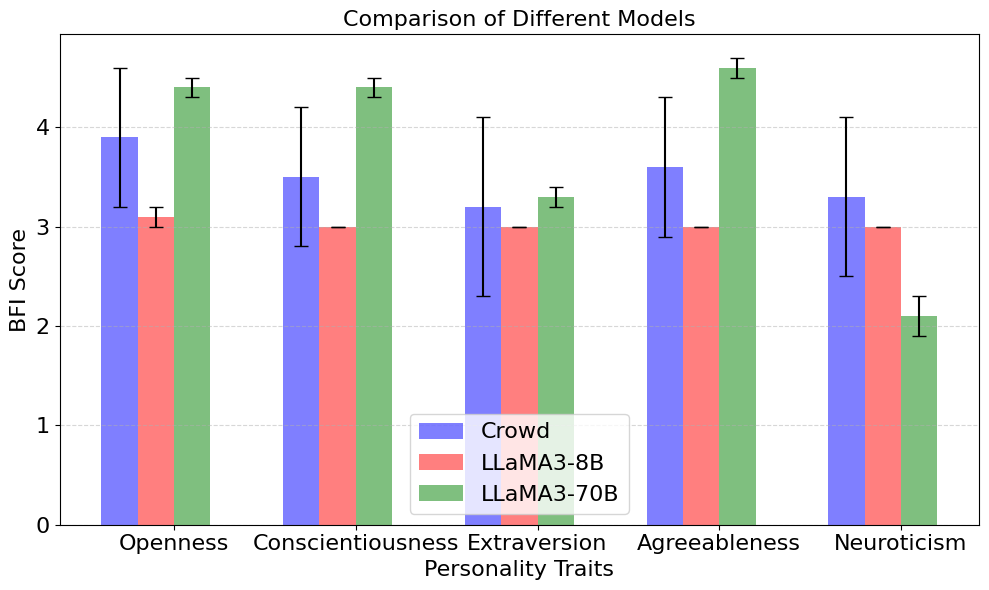

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data values for each method
questionnaire = "BFI" # BFI, IPIP-NEO
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']

labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
crowd_labeled = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_mean" for i in labels]].values.tolist()[0]
llama3_8b_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_8b")][[f"{i}_mean" for i in labels]].values.tolist()[0]
llama3_70b_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_70b")][[f"{i}_mean" for i in labels]].values.tolist()[0]

crowd_labeled_std = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_std" for i in labels]].values.tolist()[0]
llama3_8b_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_8b")][[f"{i}_std" for i in labels]].values.tolist()[0]
llama3_70b_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_70b")][[f"{i}_std" for i in labels]].values.tolist()[0]

# Grouping data for plotting
data = [crowd_labeled, llama3_8b_method, llama3_70b_method]
data_std = [crowd_labeled_std, llama3_8b_method_std, llama3_70b_method_std]
bar_labels = ['Crowd', 'LLaMA3-8B', 'LLaMA3-70B']
x = np.arange(len(labels))  # X-axis positions
bar_width = 0.2  # Width of each bar

# Plotting
plt.figure(figsize=(10, 6))
for i, (values, std) in enumerate(zip(data, data_std)):
    plt.bar(x + i * bar_width, values, yerr=std, capsize=5, alpha=0.5, width=bar_width, label=bar_labels[i], color=colors[i % len(colors)])

# Customizing plot
plt.xlabel('Personality Traits', fontsize=16)
plt.ylabel(f'{questionnaire} Score', fontsize=16)
plt.xticks(x + bar_width * 1.5, labels, fontsize=16)  # Center ticks on groups
plt.yticks(fontsize=16)
plt.title(f'Comparison of Different Models', fontsize=16)
plt.legend(fontsize=16, loc='lower center')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
# plt.show()
plt.savefig(f"stats/plots/questionnaire_summary/{questionnaire}_summary.pdf", bbox_inches='tight')


Tables

In [2]:
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for idx_label, label in enumerate(labels):
    df[f"{label}"] = df[f"{label}_mean"].astype(str) + r" $\gm$ " + df[f"{label}_std"].astype(str)
    df = df.drop(columns=[f"{label}_mean", f"{label}_std"])

In [12]:
f'{method_abbr}_{mode}'

'prompt__0xxxx'

In [13]:
# llama3 8b
data_dict = {
    "Crowd": [],
    "Prompting": [],
    "SFT": [],
    "DPO": []
}

def find_non_x_index(string):
    # Iterate through the string to find the index where the character is not 'x'
    for i, char in enumerate(string):
        if char != 'x':
            return i
    # If no such index exists, you can raise an error or return a special value
    raise ValueError("No character other than 'x' found in the string.")

data = []
for questionnaire in ['BFI', 'IPIP-NEO']:
    for model, model_abbr in [['LLaMA3-8B', 'llama3_8b'], ['LLaMA3-70B', 'llama3_70b']]:
        for method, method_abbr in [['Crowd', 'crowd'], ['Prompting', 'prompt_'], ['SFT', 'train_'], ['DPO', 'train_dpo_']]:
            row = [questionnaire, model, method]
            if method != "Crowd":
                for mode in ["0xxxx", '1xxxx', 'x0xxx', 'x1xxx', 'xx0xx', 'xx1xx', 'xxx0x', 'xxx1x', 'xxxx0', 'xxxx1']:
                    label = labels[find_non_x_index(mode)]
                    row.append(df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model_abbr)][[label]].values.tolist()[0][0])
            else:
                row.extend(df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'crowd')][[labels[0], labels[0], labels[1], labels[1], labels[2], labels[2], labels[3], labels[3], labels[4], labels[4]]].values.tolist()[0])
            data.append(row)

In [18]:
df_1 = pd.DataFrame(data)
df_1.columns = ['Questionnaire', 'Model', 'Method'] + [f"{level} {label}" for label in labels for level in ['High', 'Low']]
df_1 = df_1.set_index(['Questionnaire', 'Model', 'Method'])
print(df_1.to_latex(multirow=True, index=True, header=False))

\begin{tabular}{lllllllllllll}
\toprule
Questionnaire & Model & Method &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{8}{*}{BFI} & \multirow[t]{4}{*}{LLaMA3-8B} & Crowd & 3.9 $\gm$ 0.7 & 3.9 $\gm$ 0.7 & 3.5 $\gm$ 0.7 & 3.5 $\gm$ 0.7 & 3.2 $\gm$ 0.9 & 3.2 $\gm$ 0.9 & 3.6 $\gm$ 0.7 & 3.6 $\gm$ 0.7 & 3.3 $\gm$ 0.8 & 3.3 $\gm$ 0.8 \\
 &  & Prompting & 4.7 $\gm$ 0.2 & 1.2 $\gm$ 0.1 & 4.9 $\gm$ 0.1 & 1.7 $\gm$ 0.1 & 5.0 $\gm$ 0.0 & 1.1 $\gm$ 0.1 & 5.0 $\gm$ 0.0 & 2.5 $\gm$ 0.5 & 4.4 $\gm$ 0.3 & 1.2 $\gm$ 0.1 \\
 &  & SFT & 5.0 $\gm$ 0.0 & 2.0 $\gm$ 0.2 & 5.0 $\gm$ 0.0 & 1.6 $\gm$ 0.1 & 4.7 $\gm$ 0.4 & 2.7 $\gm$ 0.5 & 5.0 $\gm$ 0.0 & 1.2 $\gm$ 0.1 & 4.1 $\gm$ 0.2 & 2.5 $\gm$ 0.0 \\
 &  & DPO & 5.0 $\gm$ 0.0 & 1.6 $\gm$ 0.2 & 5.0 $\gm$ 0.0 & 1.6 $\gm$ 0.1 & 4.8 $\gm$ 0.3 & 2.5 $\gm$ 0.0 & 4.8 $\gm$ 0.2 & 1.0 $\gm$ 0.0 & 3.5 $\gm$ 0.0 & 1.1 $\gm$ 0.1 \\
\cline{2-13}
 & \multirow[t]{4}{*}{LLaMA3-70B} & Crowd & 3.9 $\gm$ 0.7 & 3.9 $\gm$ 0.7 & 3.5 $\gm$ 0.7 & 3.5 $\gm$ 0.7 & 3.2 $\gm$ 0.9 

All figures

/tmp/ipykernel_1978011/2535435416.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


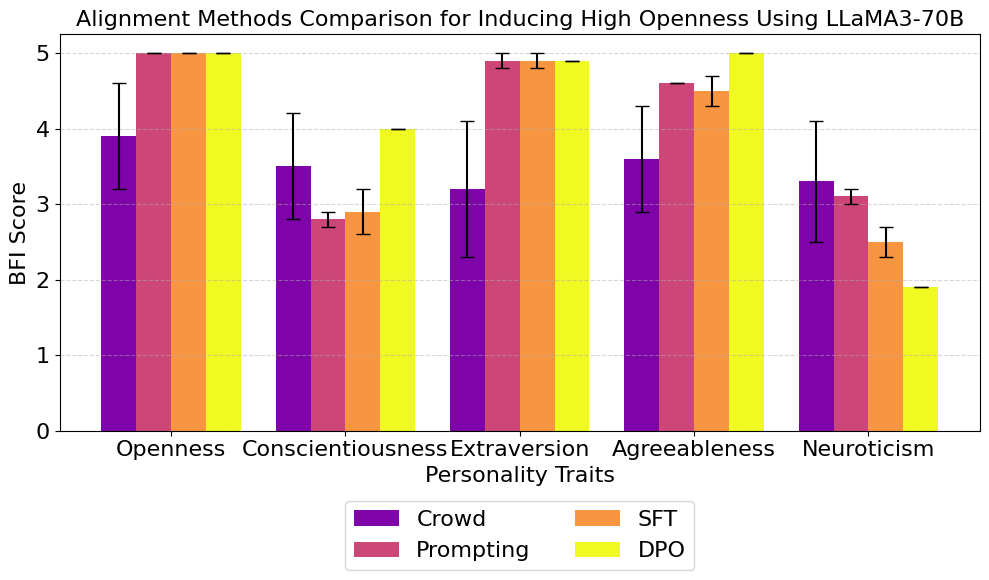

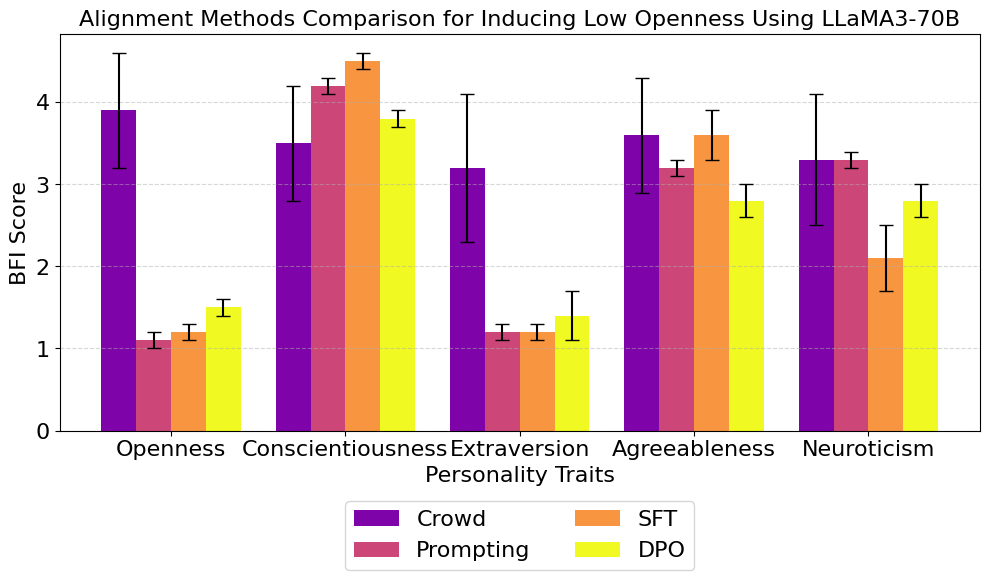

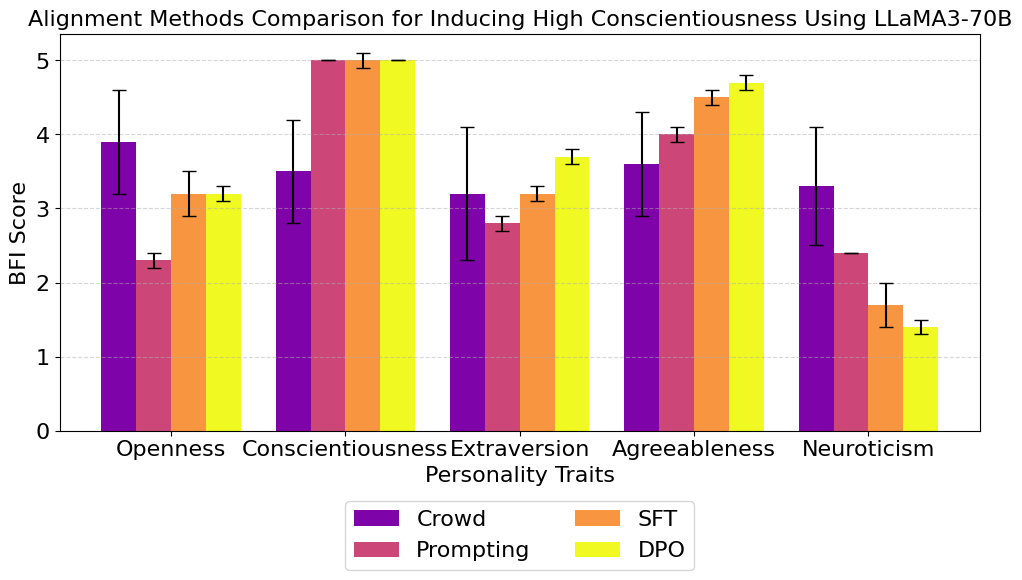

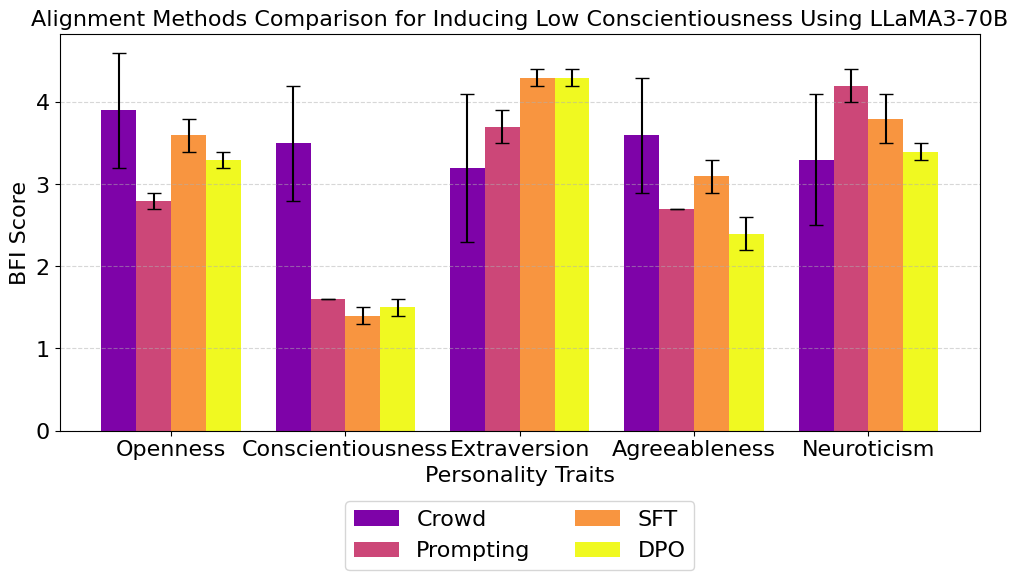

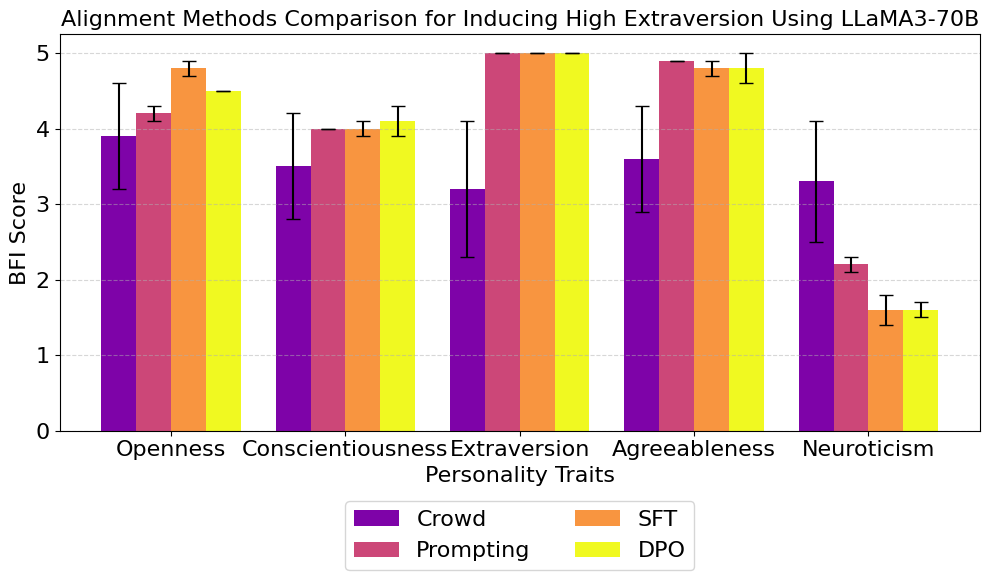

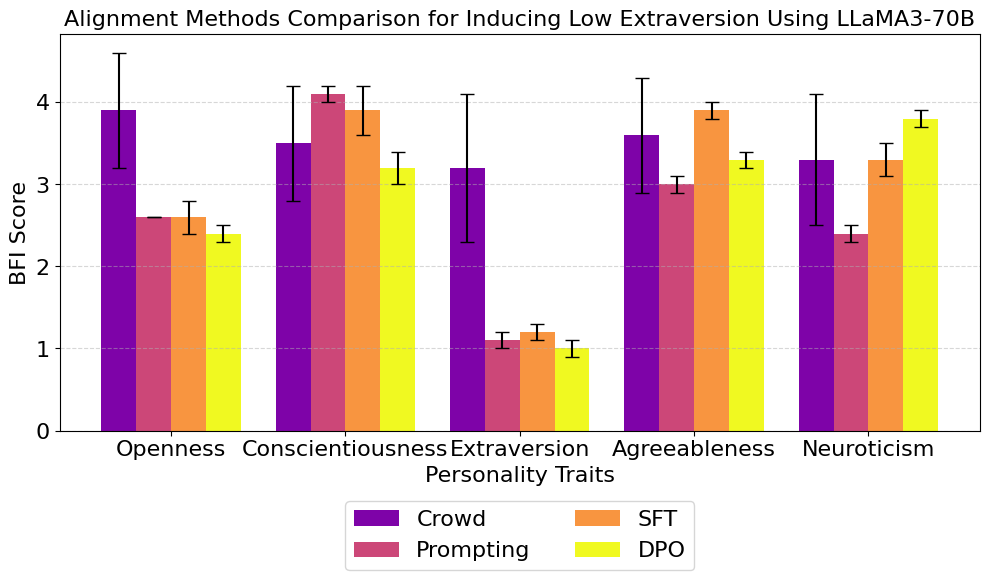

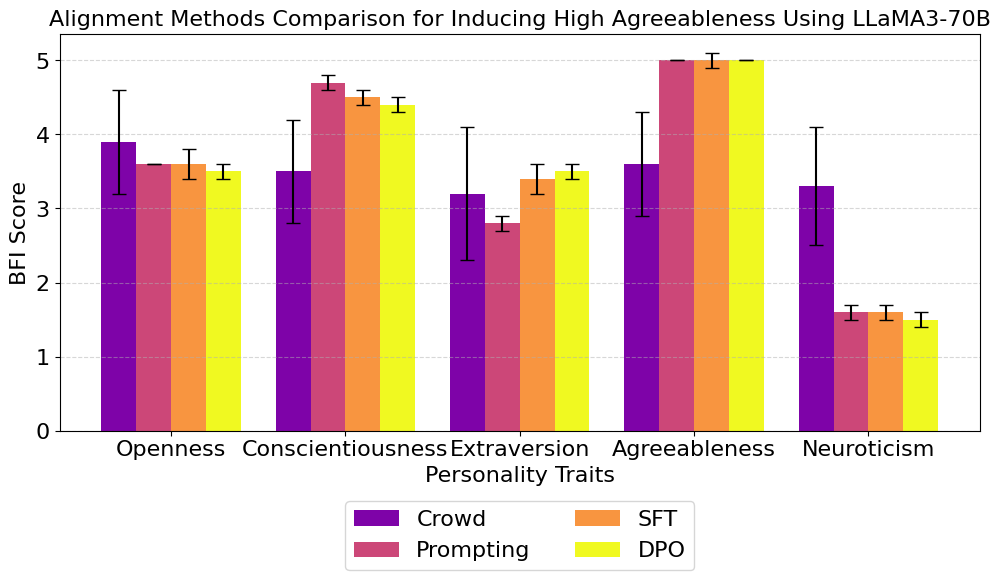

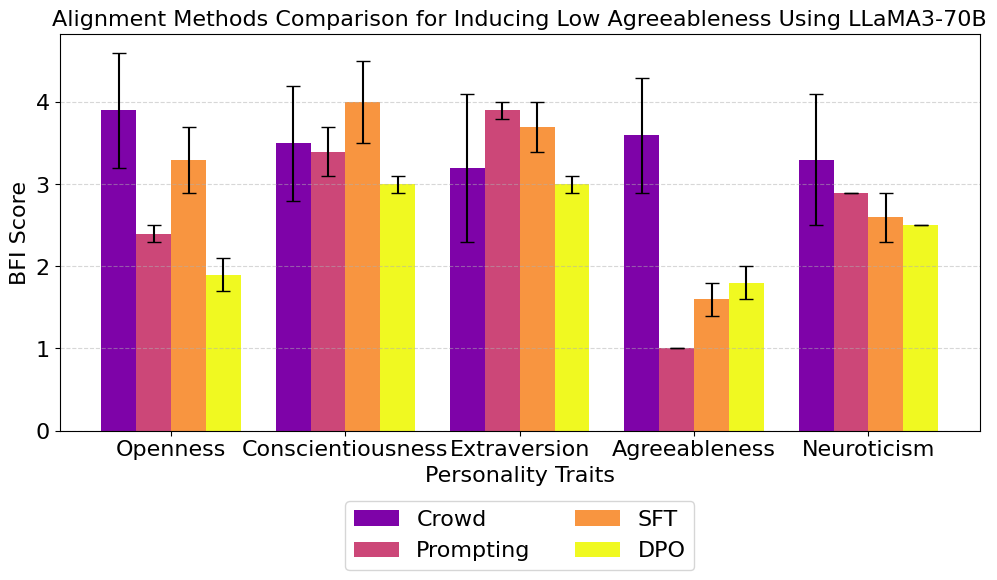

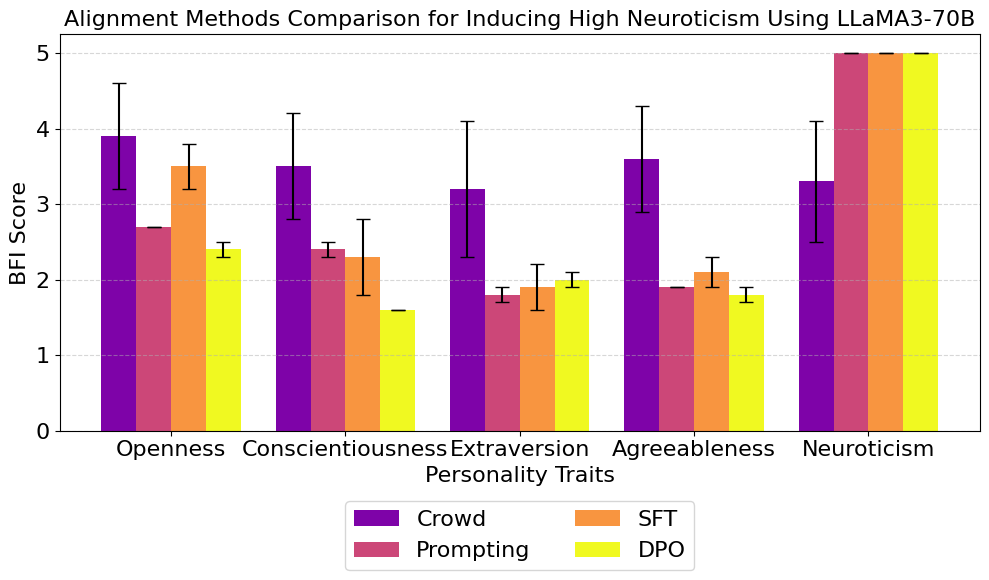

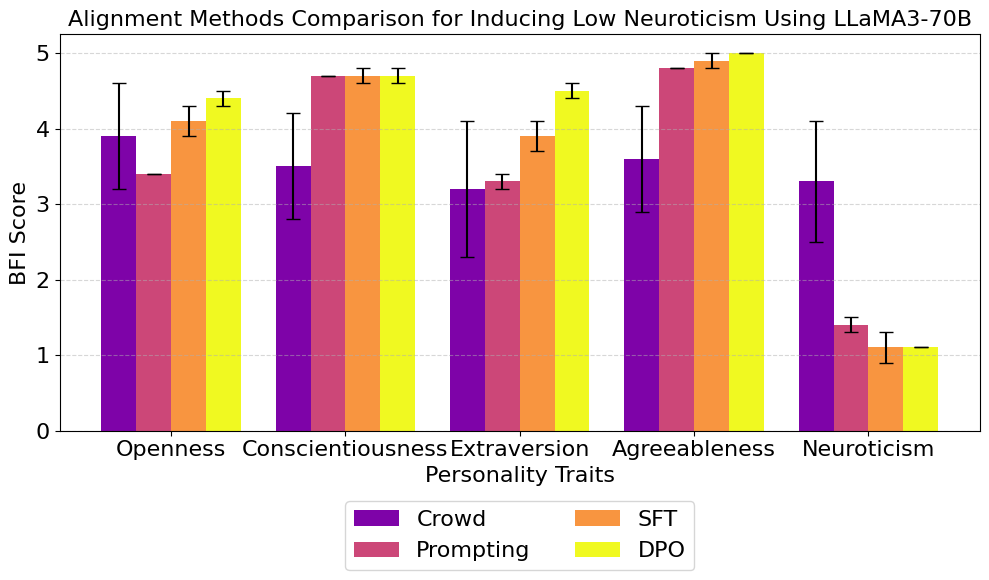

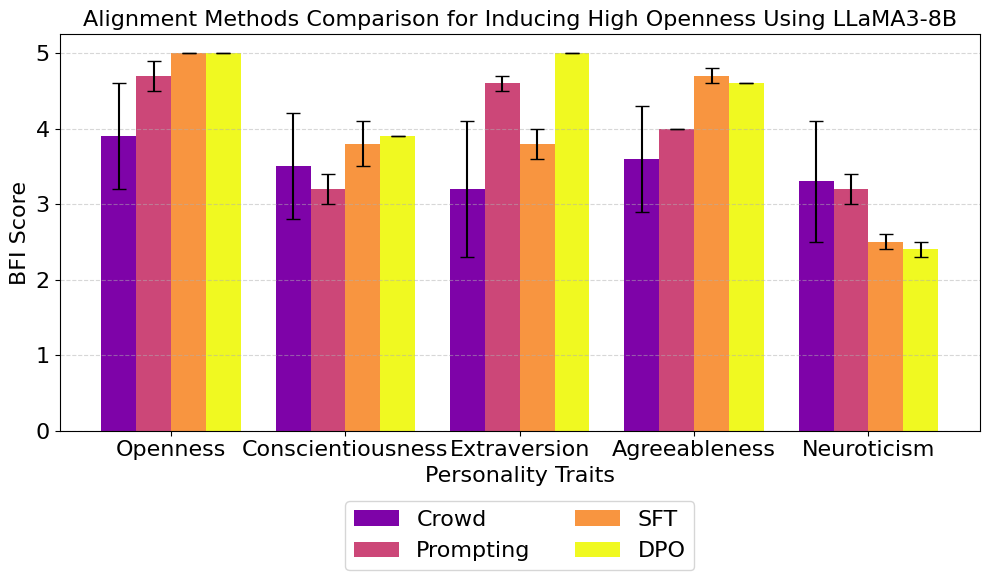

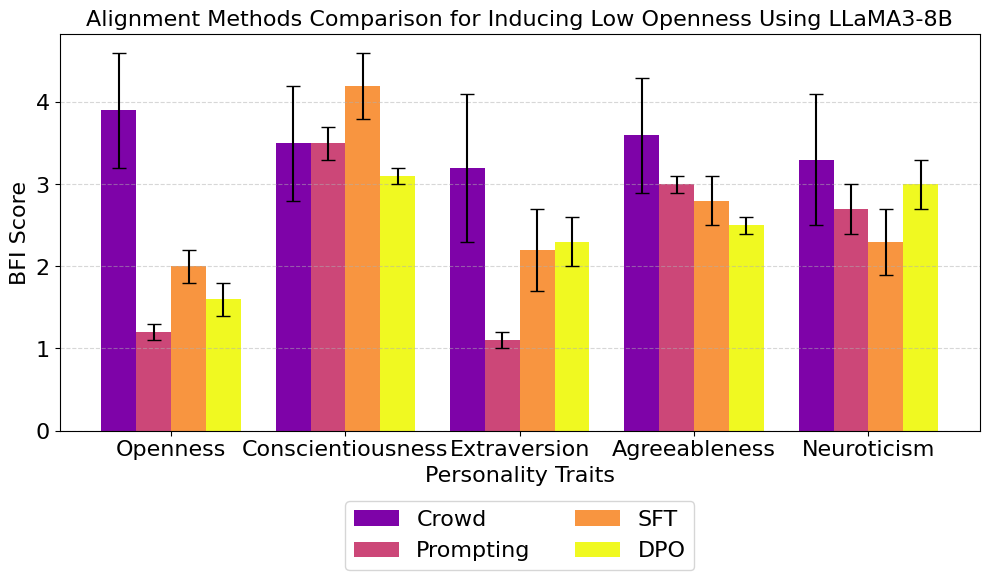

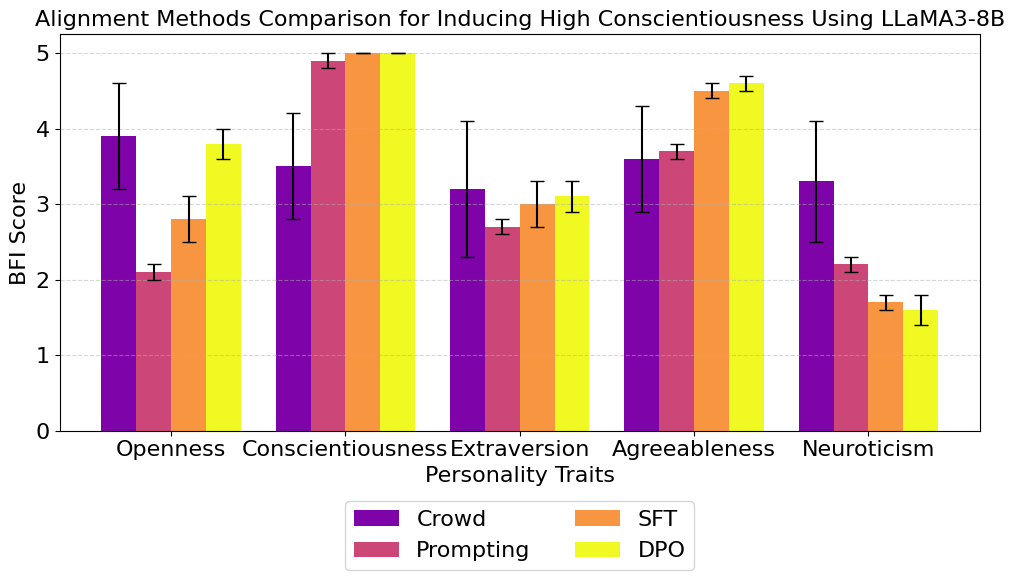

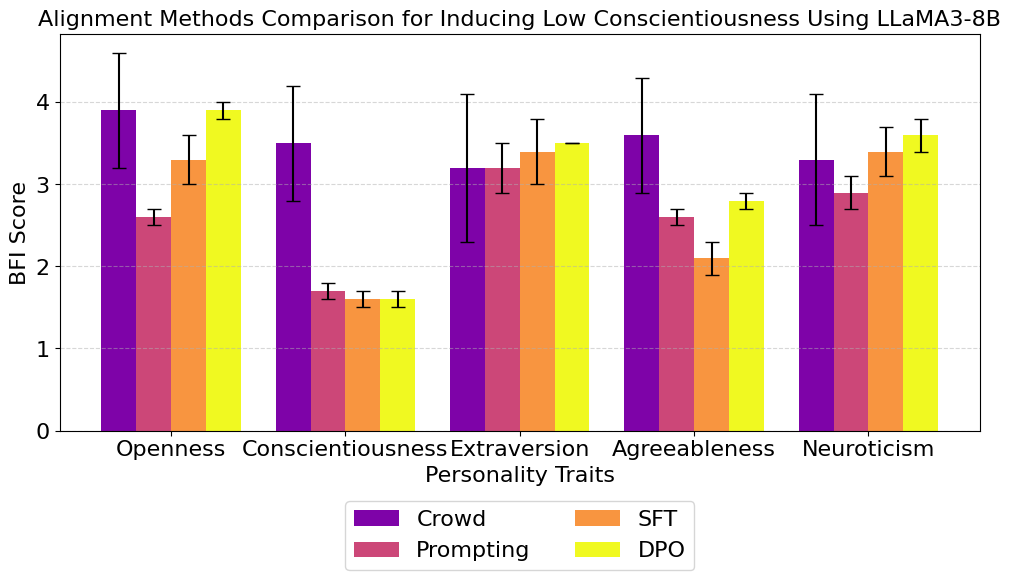

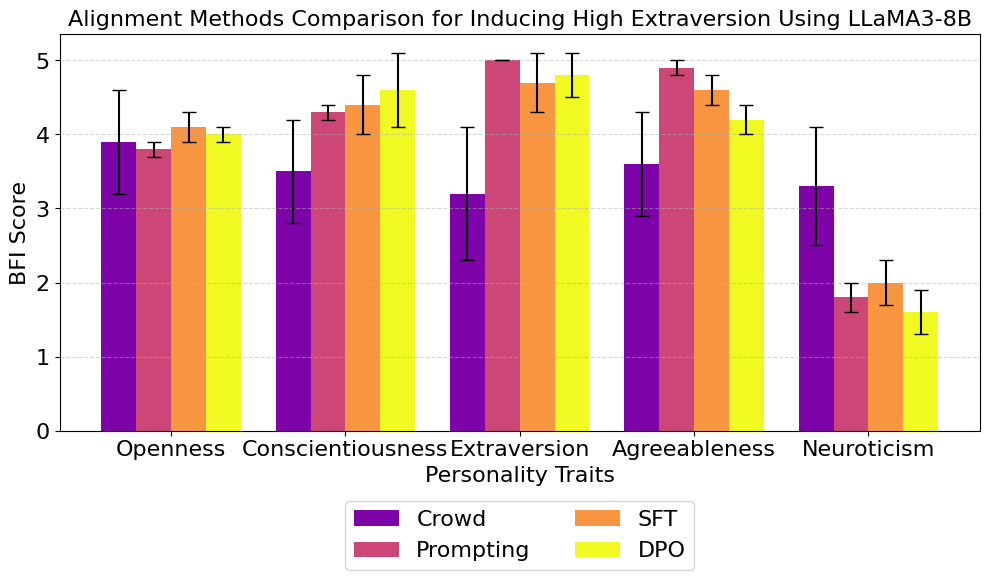

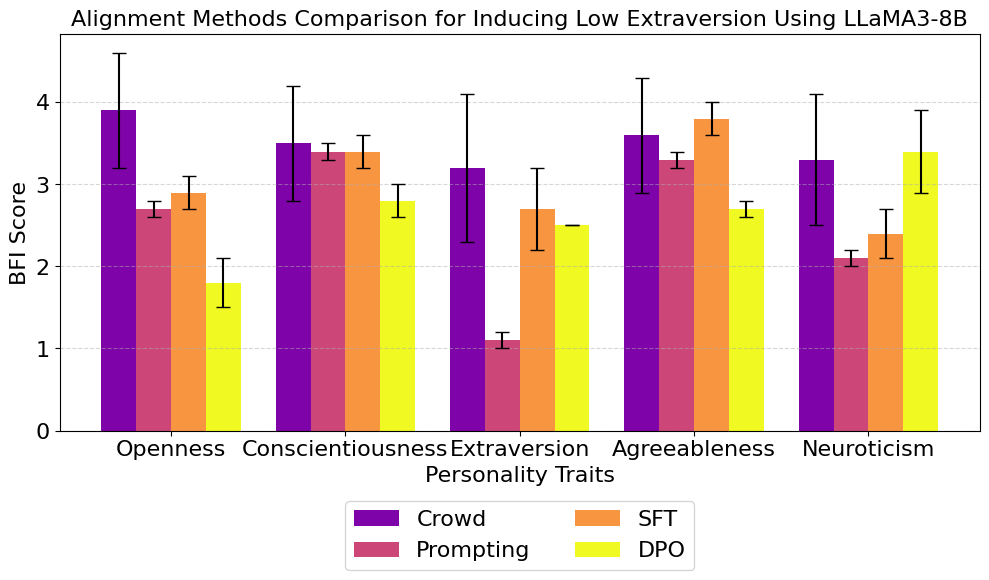

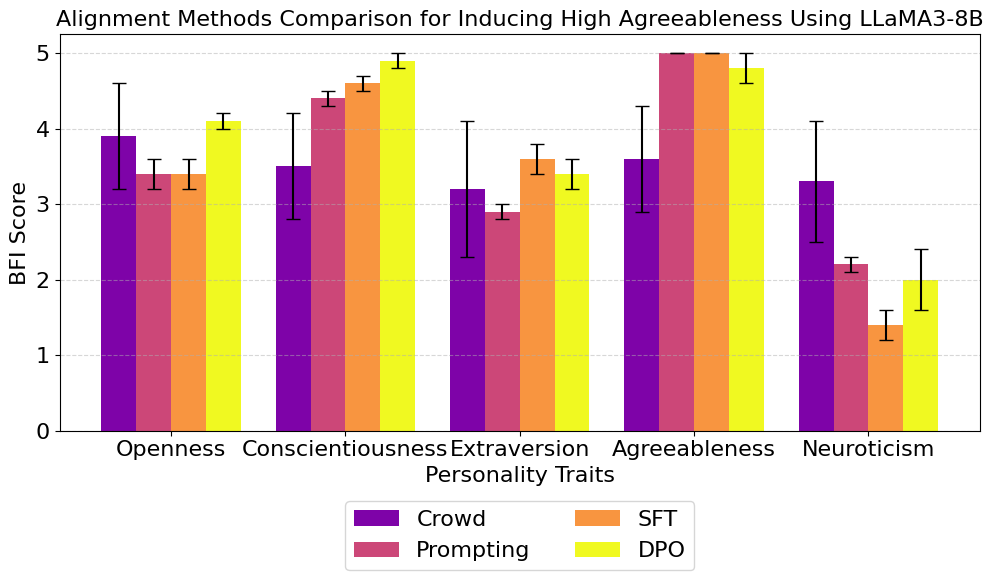

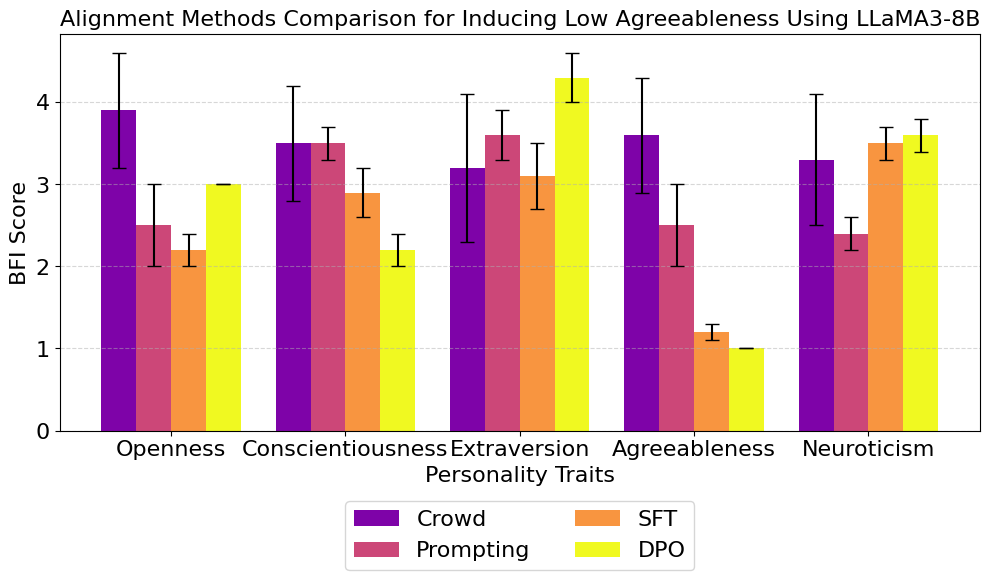

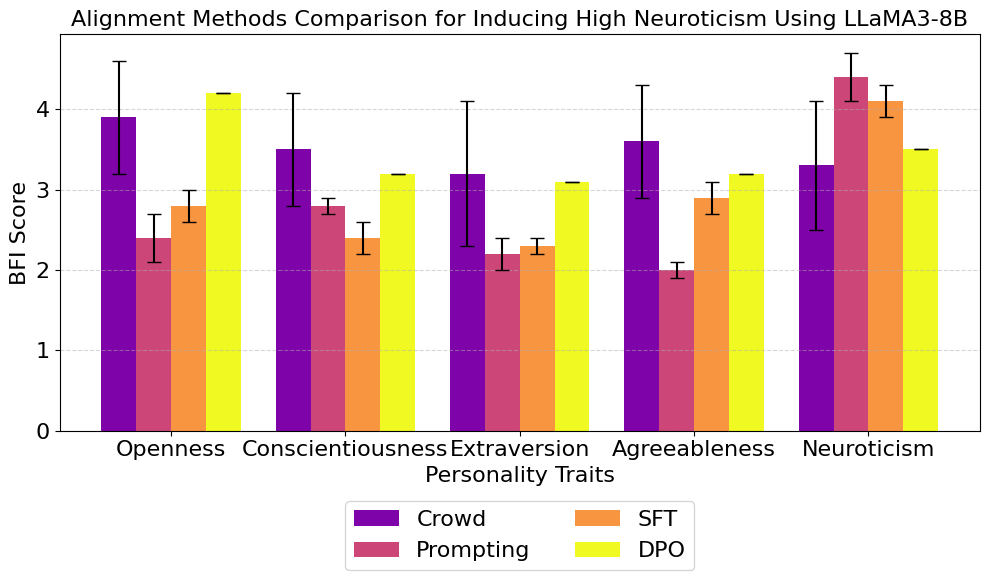

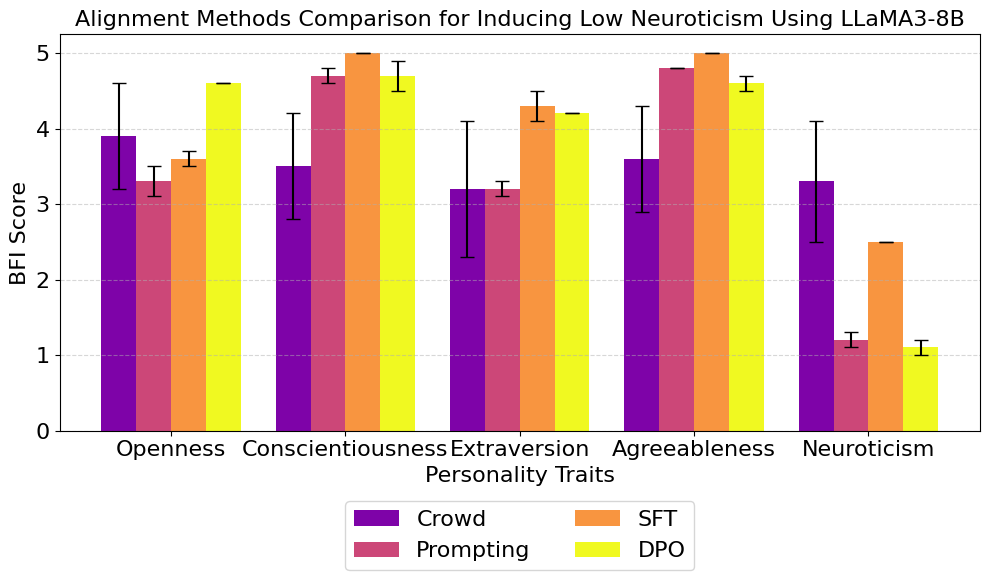

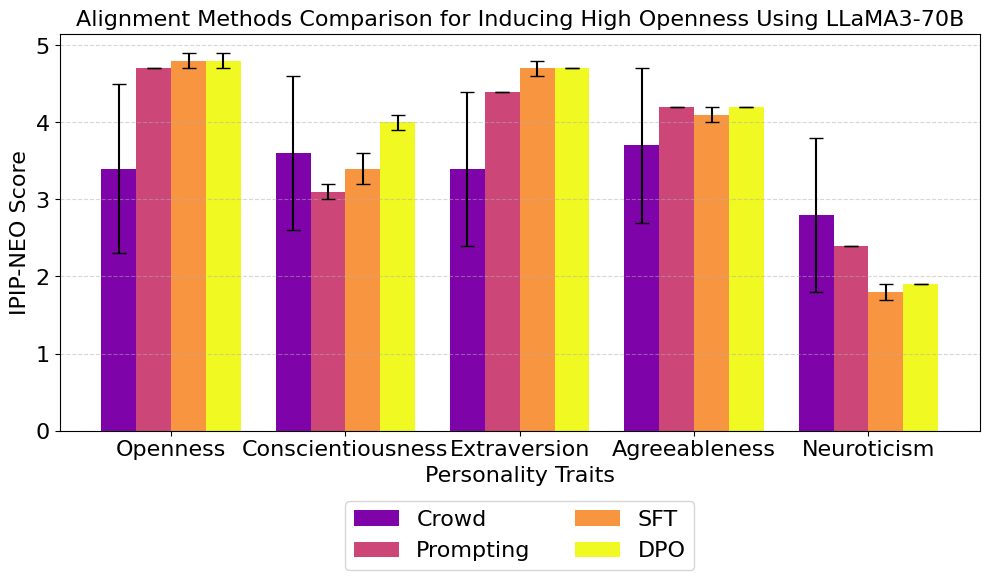

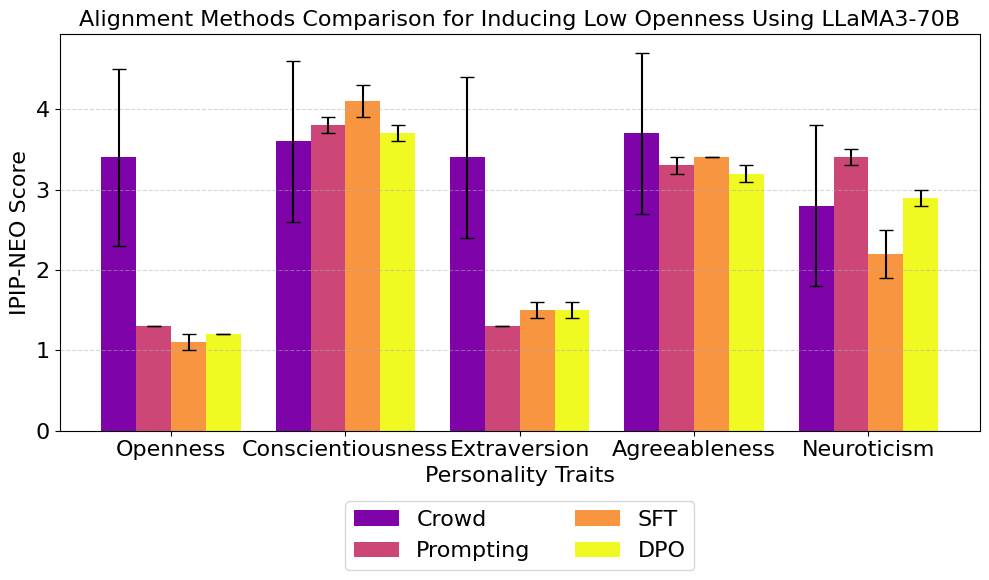

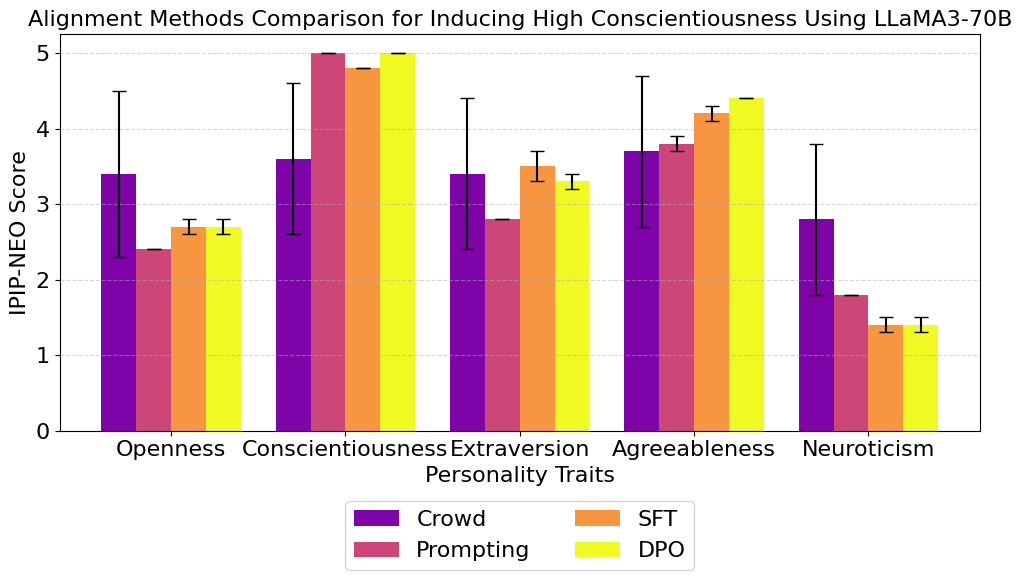

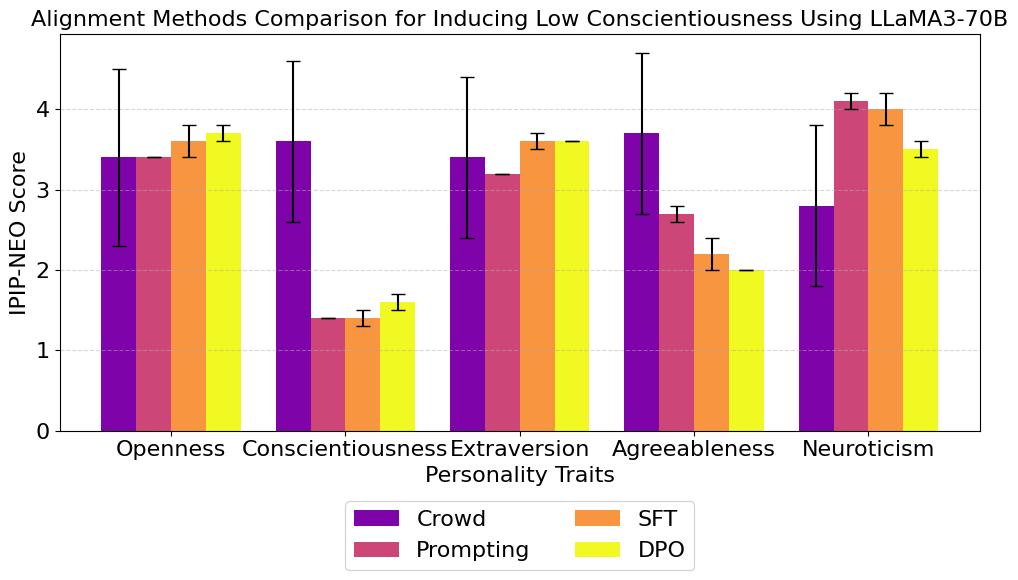

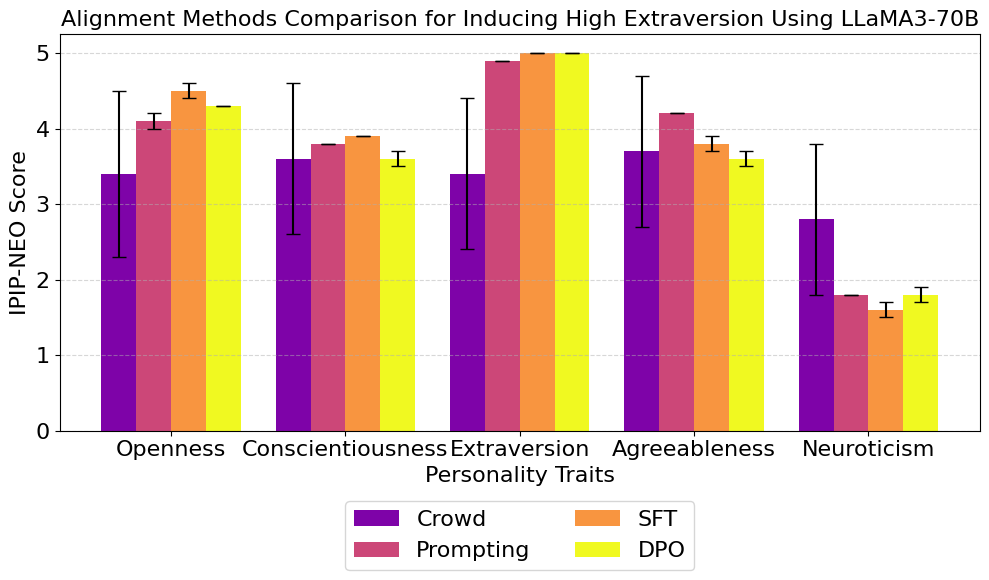

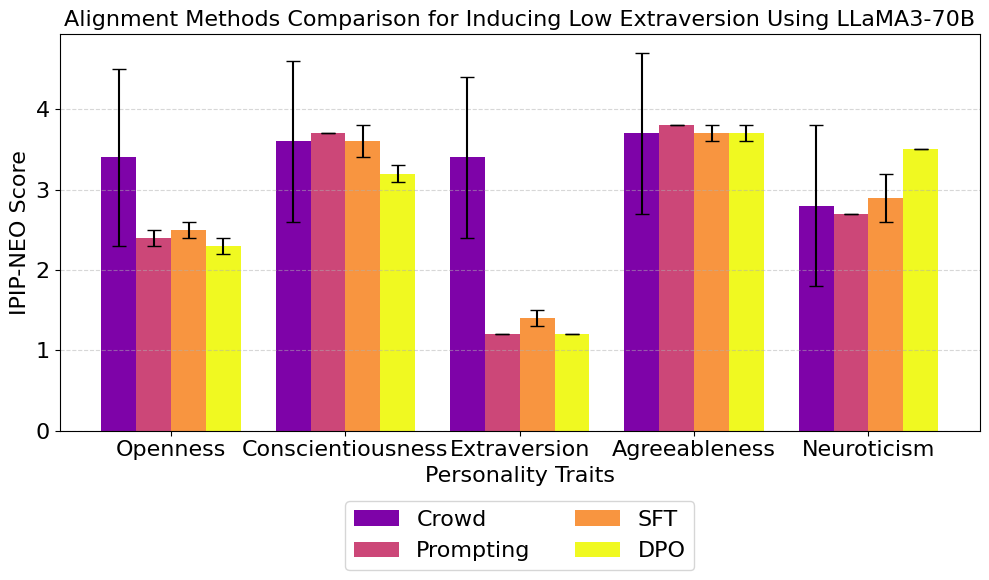

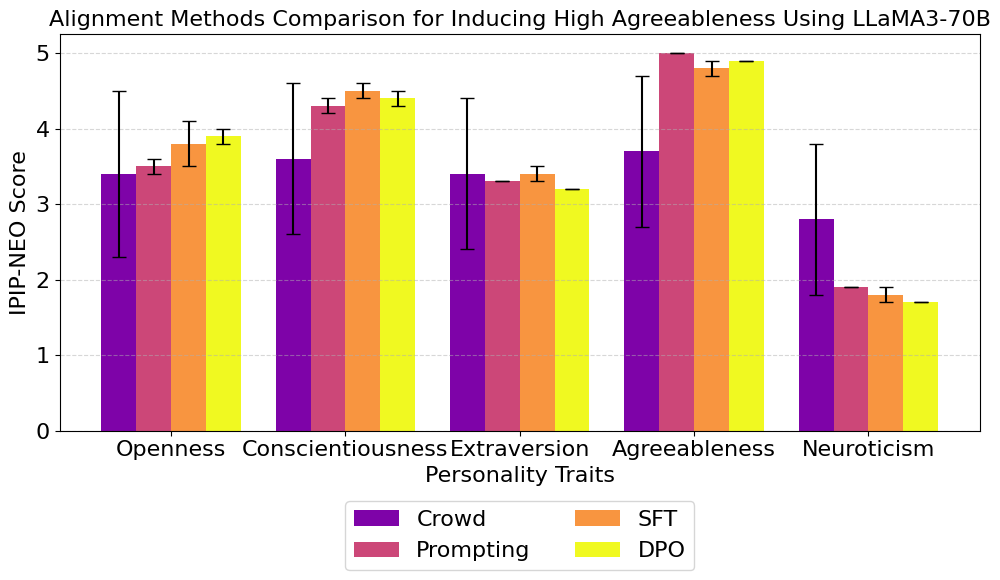

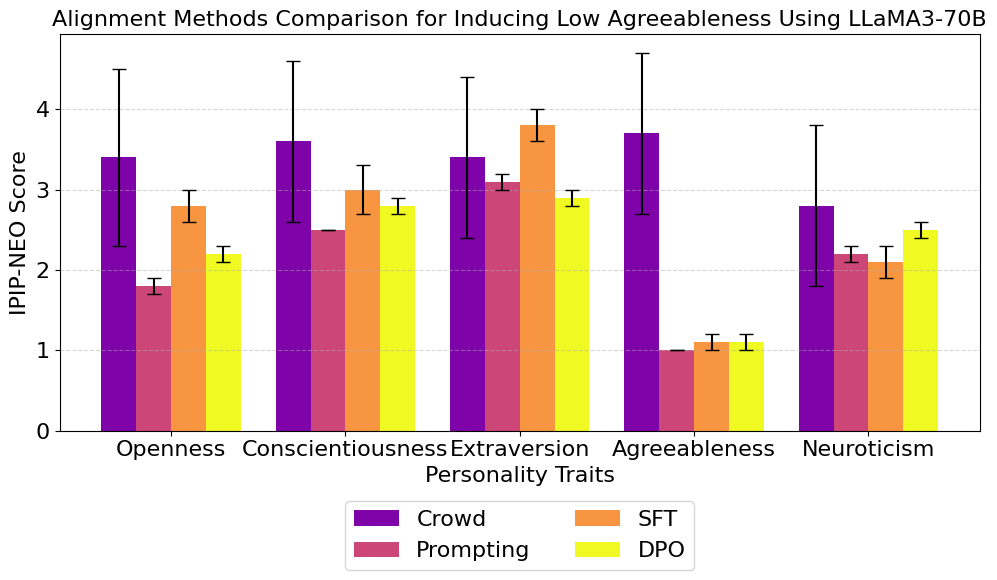

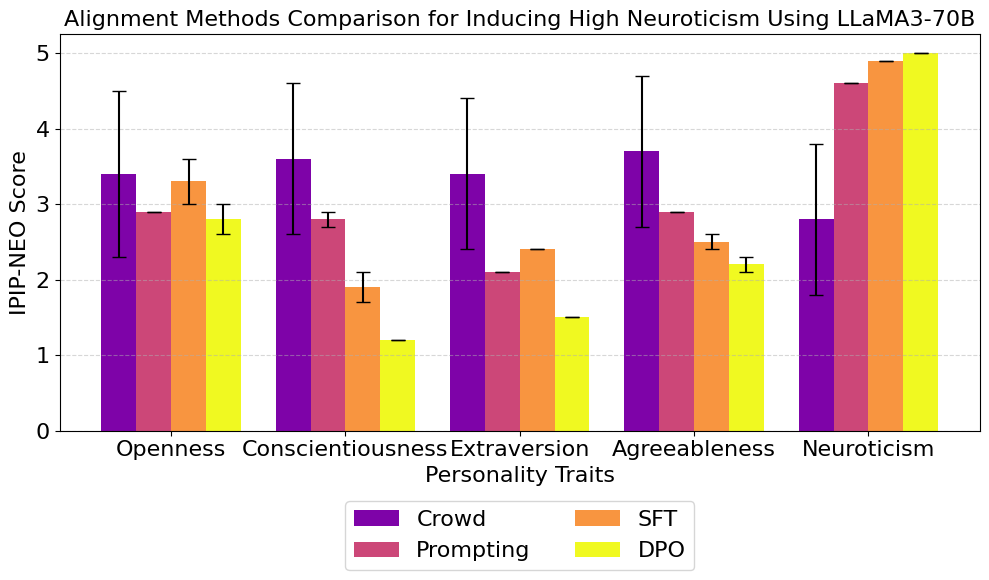

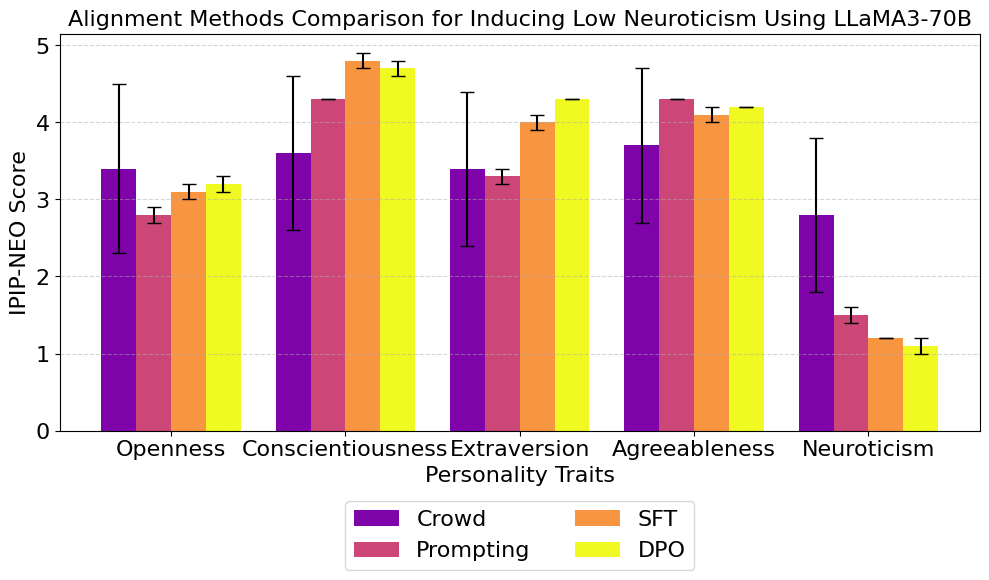

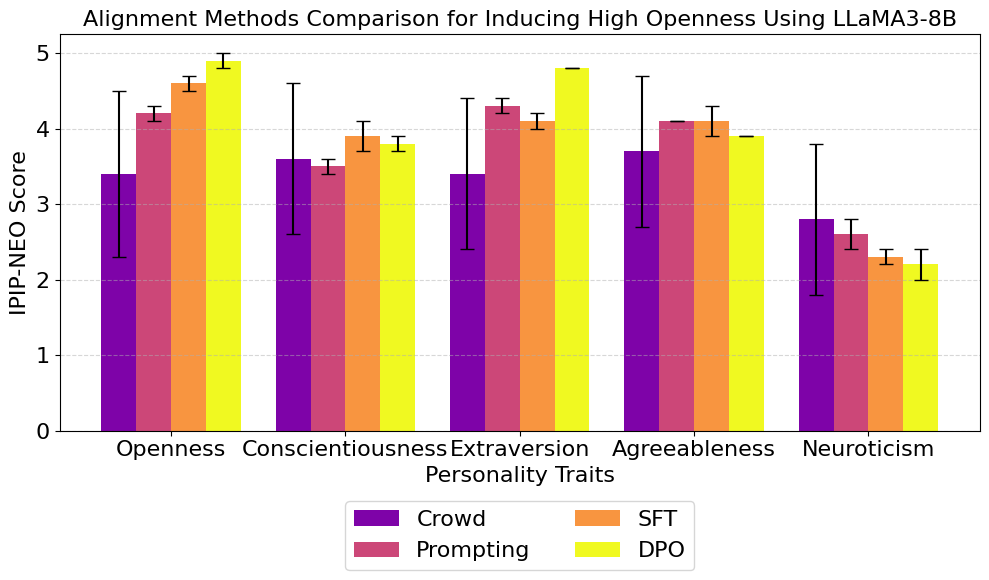

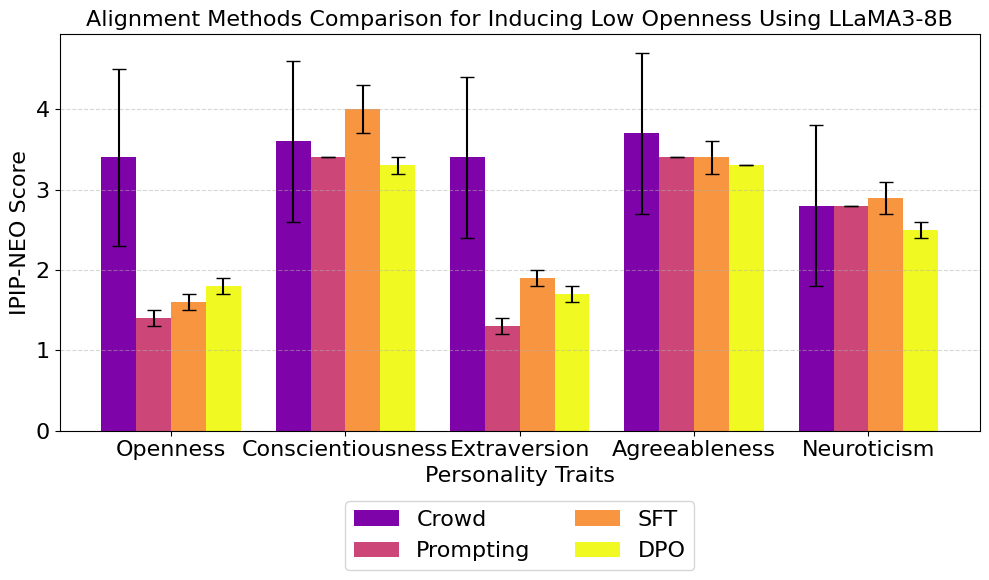

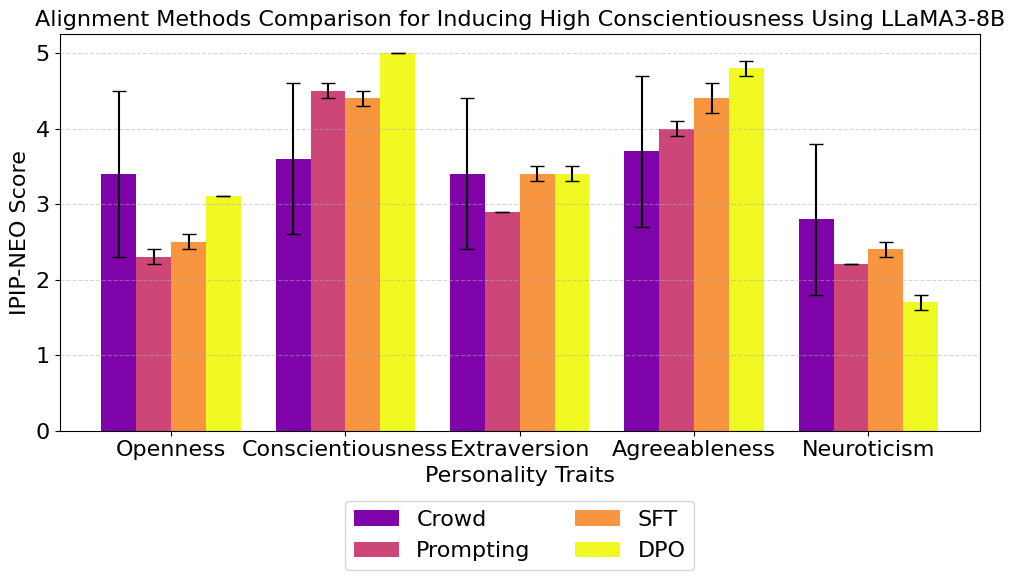

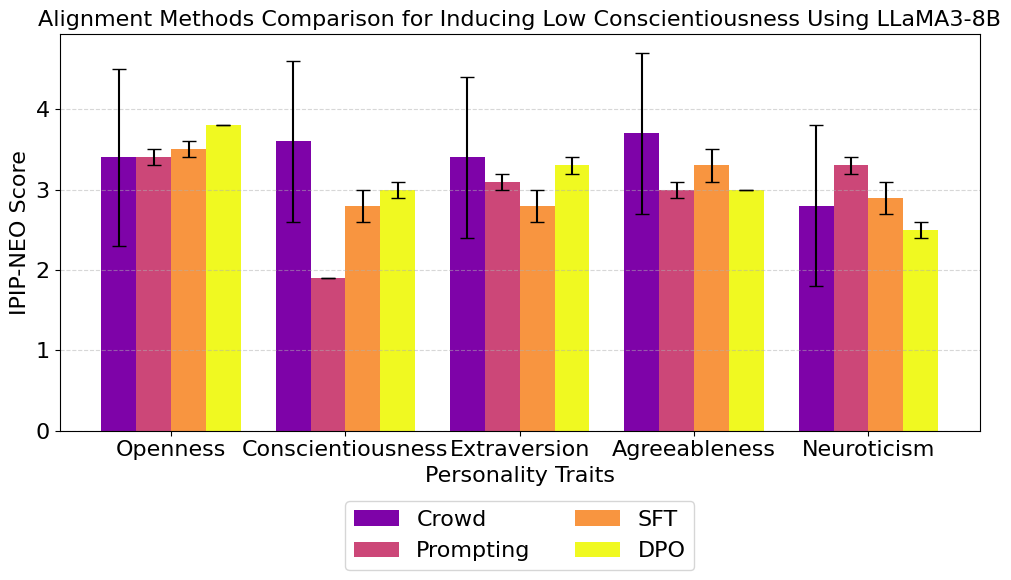

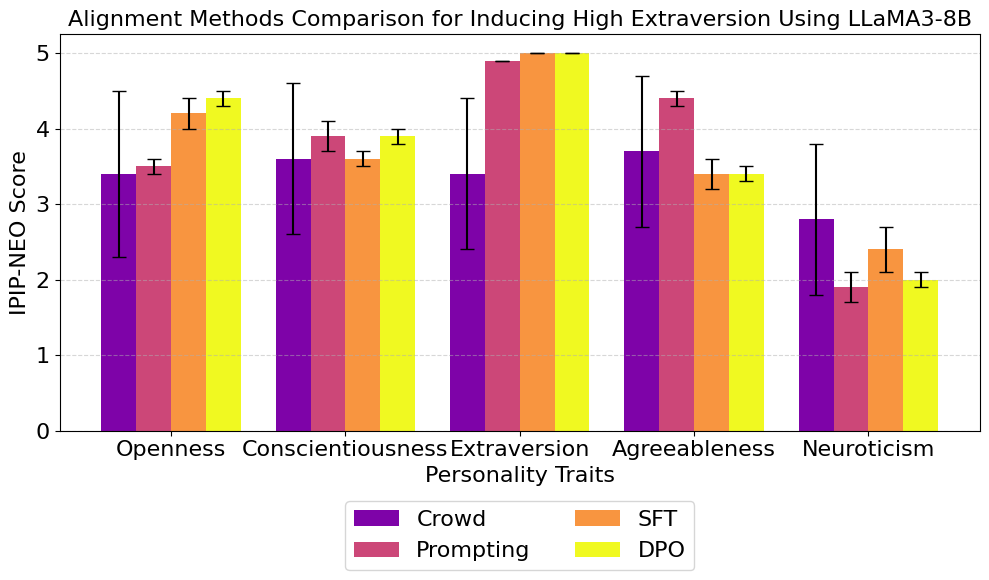

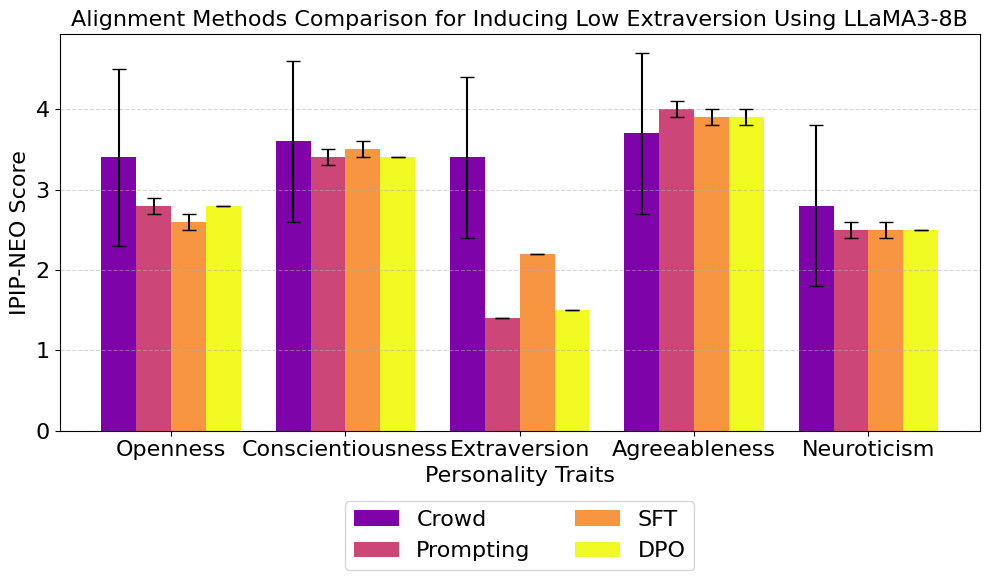

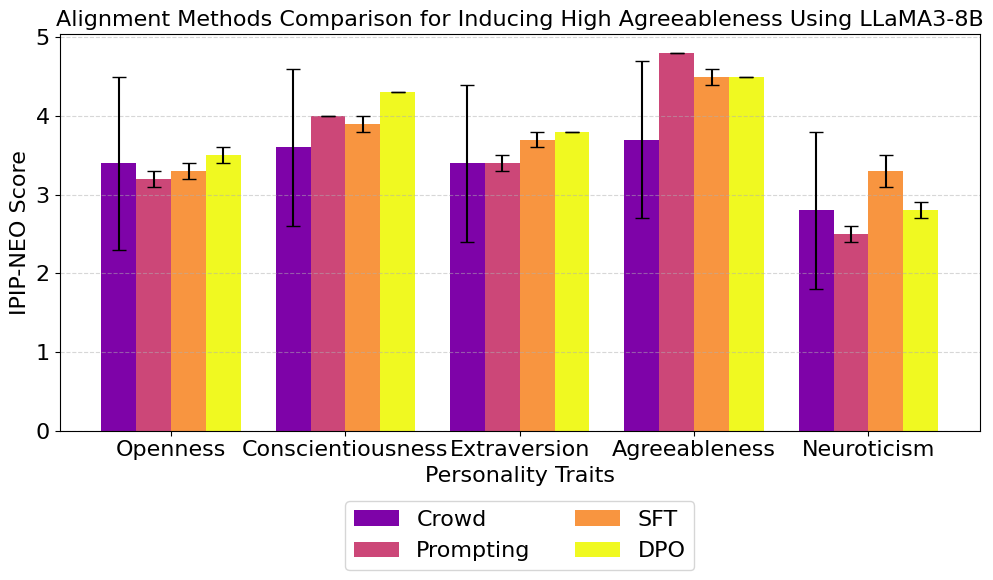

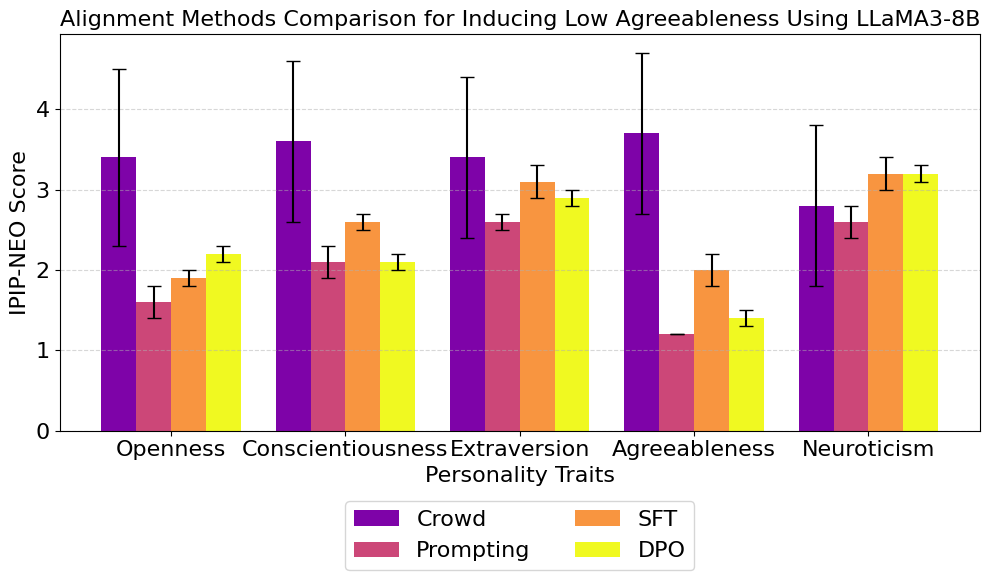

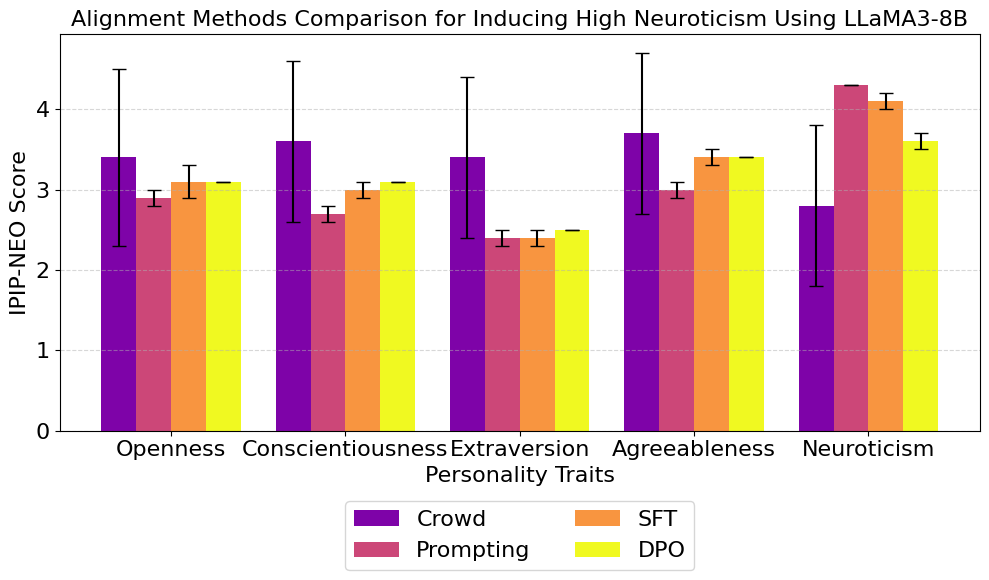

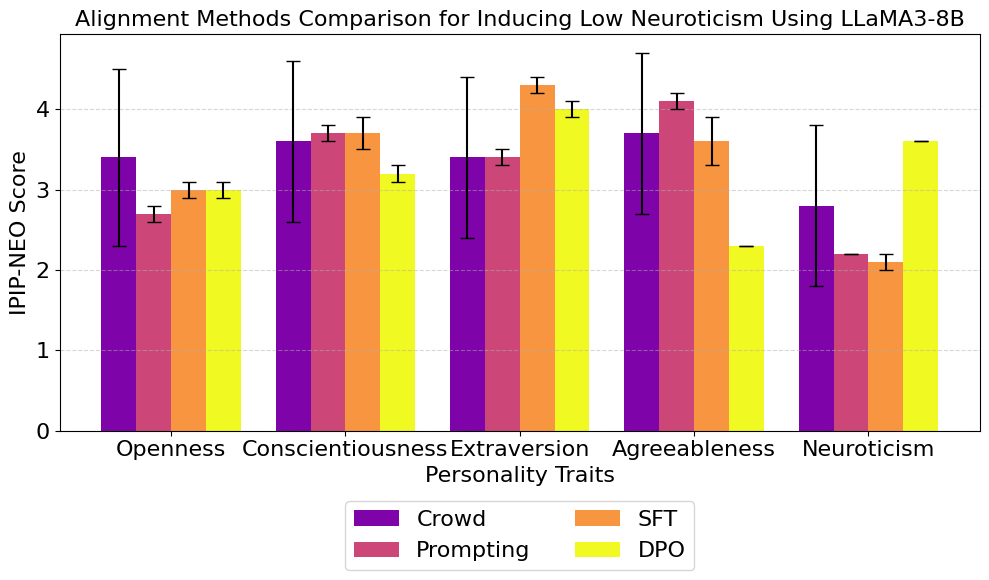

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["BFI", "IPIP-NEO"]
models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

for questionnaire in questionnaires:
    for model, model_abbr in models:
        for mode, description in description_modes:
            # colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
            cmap = plt.cm.plasma
            colors = [cmap(i) for i in np.linspace(0, 1, 5)]
            patterns = ['/', '\\', '|', '-']

            crowd_labeled = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_mean" for i in labels]].values.tolist()[0]
            prompting_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'prompt_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]
            sft_training = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]
            dpo_training = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_dpo_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]

            crowd_labeled_std = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_std" for i in labels]].values.tolist()[0]
            prompting_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'prompt_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]
            sft_training_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]
            dpo_training_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_dpo_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]

            # Grouping data for plotting
            data = [crowd_labeled, prompting_method, sft_training, dpo_training]
            data_std = [crowd_labeled_std, prompting_method_std, sft_training_std, dpo_training_std]
            bar_labels = ['Crowd', 'Prompting', 'SFT', 'DPO']
            x = np.arange(len(labels))  # X-axis positions
            bar_width = 0.2  # Width of each bar

            # Plotting
            plt.figure(figsize=(10, 6))
            for i, (values, std) in enumerate(zip(data, data_std)):
                plt.bar(x + i * bar_width, values, yerr=std, capsize=5, width=bar_width, label=bar_labels[i], color=colors[(i+1) % len(colors)])

            # Customizing plot
            plt.xlabel('Personality Traits', fontsize=16)
            plt.ylabel(f'{questionnaire} Score', fontsize=16)
            plt.xticks(x + bar_width * 1.5, labels, fontsize=16)  # Center ticks on groups
            plt.yticks(fontsize=16)
            plt.title(f'Alignment Methods Comparison for Inducing {description} Using {model_abbr}', fontsize=16)
            plt.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
            plt.grid(axis='y', linestyle='--', alpha=0.5)

            # Display the plot
            plt.tight_layout()
            # plt.show()
            plt.savefig(f"stats/plots/alignment/{questionnaire}_{model}_{'_'.join(description.lower().split())}.pdf", bbox_inches='tight')